In [1]:
import pandas as pd
from matplotlib import rcParams
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
import seaborn as sns

In [2]:
df=pd.read_csv('heart_disease_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.head(50)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1598 non-null   int64  
 1   sex       1598 non-null   int64  
 2   cp        1598 non-null   int64  
 3   trestbps  1598 non-null   int64  
 4   chol      1598 non-null   int64  
 5   fbs       1598 non-null   int64  
 6   restecg   1598 non-null   int64  
 7   thalach   1598 non-null   int64  
 8   exang     1598 non-null   int64  
 9   oldpeak   1598 non-null   float64
 10  slope     1598 non-null   int64  
 11  ca        1598 non-null   int64  
 12  thal      1598 non-null   int64  
 13  target    1598 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 174.9 KB


In [4]:
df.tail(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1548,54,1,4,110,239,0,0,126,1,2.8,2,1,7,1
1549,65,1,4,135,254,0,2,127,0,2.8,2,1,7,1
1550,57,1,3,150,168,0,0,174,0,1.6,1,0,3,0
1551,63,1,4,130,330,1,2,132,1,1.8,1,3,7,1
1552,35,0,4,138,183,0,0,182,0,1.4,1,0,3,0
1553,41,1,2,135,203,0,0,132,0,0.0,2,0,6,0
1554,62,0,3,130,263,0,0,97,0,1.2,2,1,7,1
1555,43,0,4,132,341,1,2,136,1,3.0,2,0,7,1
1556,58,0,1,150,283,1,2,162,0,1.0,1,0,3,0
1557,52,1,1,118,186,0,2,190,0,0.0,2,0,6,0


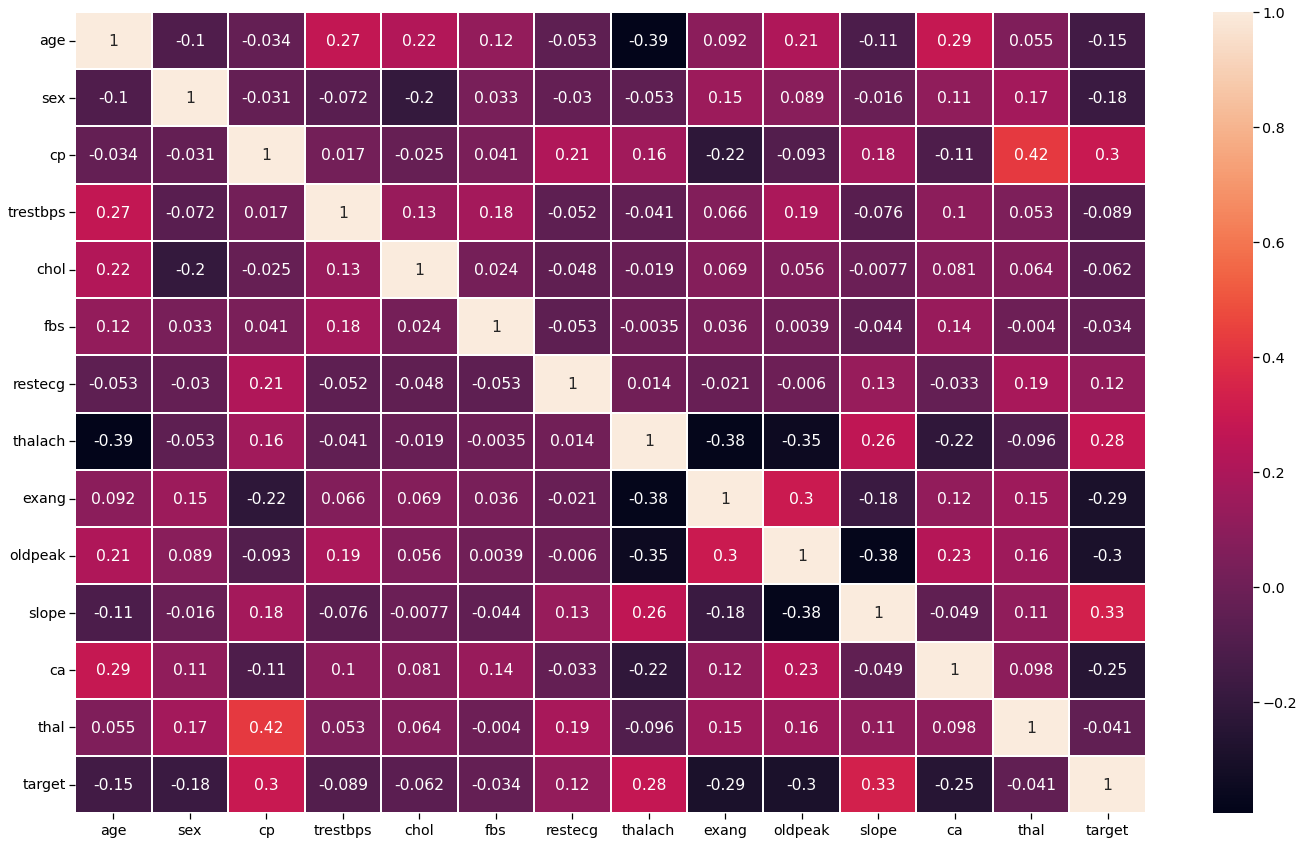

In [36]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

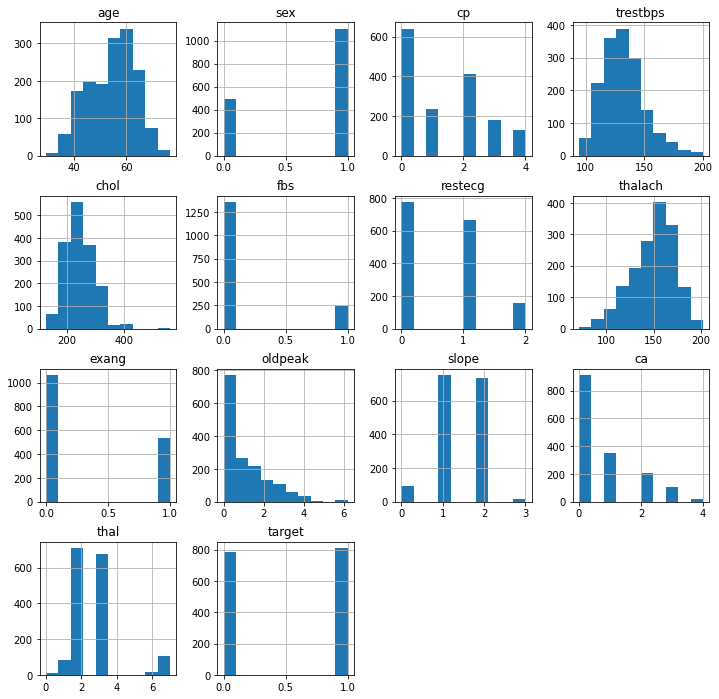

In [5]:
df.hist(figsize=(12,12))

In [6]:
gender=df.groupby(['sex'],as_index=False).count()

In [7]:
gender

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,495,495,495,495,495,495,495,495,495,495,495,495,495
1,1,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103


In [8]:
gender=gender[['sex','target']]

In [9]:
gender  # 0=women , 1=men

,sex,target
0,0,495
1,1,1103


([<matplotlib.patches.Wedge at 0x19a495b9190>,
 [Text(0.6189711919167814, 0.9093264889890315, '0'),
  Text(-0.6189711067794883, -0.909326546941293, '1')])

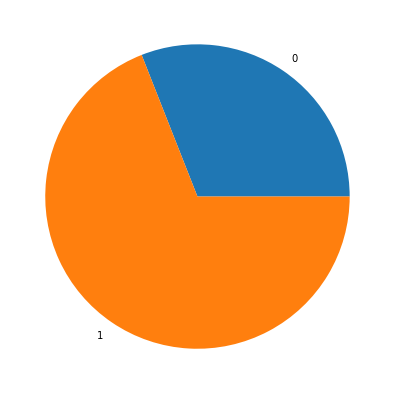

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.pie(gender.target, labels =gender.sex)  

In [11]:
df['target'].value_counts()

1    811
0    787
Name: target, dtype: int64

In [12]:
X=df.drop(['target'], axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,52,1,3,172,199,1,0,162,0,0.5,1,0,7
1594,44,1,2,120,263,0,0,173,0,0.0,1,0,7
1595,56,0,2,140,294,0,2,153,0,1.3,2,0,3
1596,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [13]:
Y=df['target']

In [14]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1593    0
1594    0
1595    0
1596    0
1597    1
Name: target, Length: 1598, dtype: int64

In [15]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [16]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
896,63,0,0,108,269,0,1,169,1,1.8,1,2,2
943,46,0,0,138,243,0,0,152,1,0.0,1,0,2
871,54,0,2,160,201,0,1,163,0,0.0,2,1,2
1233,65,1,0,135,254,0,0,127,0,2.8,1,1,3
1174,39,1,2,140,321,0,0,182,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,70,1,0,145,174,0,1,125,1,2.6,0,0,3
1242,49,0,1,134,271,0,1,162,0,0.0,1,0,2
1194,64,0,0,180,325,0,1,154,1,0.0,2,0,2
359,56,1,3,120,193,0,0,162,0,1.9,1,0,3


In [17]:
Y_train.value_counts() #checking whether data is devided in equal proportion or not 

1    649
0    629
Name: target, dtype: int64

In [18]:
print(X_train.shape, X_test.shape)

(1278, 13) (320, 13)


In [19]:
# training the logistic regression model
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

C:\Users\taman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model1.score(X_test,Y_test)

0.70625

# LOGISTIC REGRESSION

In [21]:
#experiment using pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [22]:
pipe.score(X_test, Y_test)

0.7125

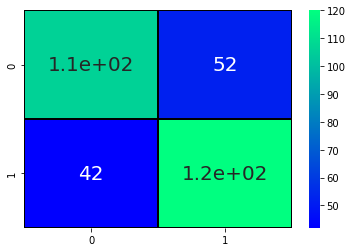

In [23]:
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

# DECISION TREE

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       158
           1       0.96      0.94      0.95       162

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320

Testing Accuracy for Decision Tree: 0.946875
Testing Sensitivity for Decision Tree: 0.937888198757764
Testing Specificity for Decision Tree: 0.9559748427672956
Testing Precision for Decision Tree: 0.9556962025316456


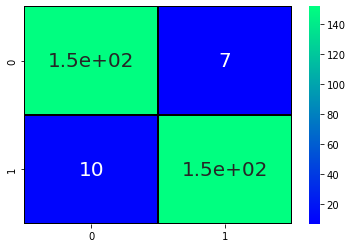

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_model = DecisionTreeClassifier(max_depth=15,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, Y, cv=10, scoring='accuracy')
m=tree_model.fit(X_train,Y_train)
prediction=m.predict(X_test)
cm= confusion_matrix(Y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(Y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

In [25]:
import joblib
joblib.dump(tree_model,'heart_disease_predictor')

['heart_disease_predictor']

In [26]:
mod=joblib.load('heart_disease_predictor')
predicted_val=mod.predict(X_test)

# Random Forest algorithm

94.06
Testing Accuracy for Random Forest: 0.940625
Testing Sensitivity for Random Forest: 0.9316770186335404
Testing Specificity for Random Forest: 0.949685534591195
Testing Precision for Random Forest: 0.9493670886075949


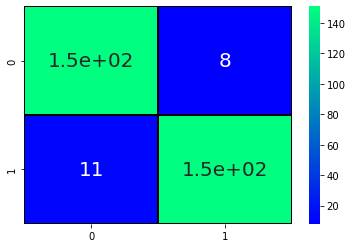

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, Y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(Y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,Y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

# KNN algorithm

KNN accuracy score is:  0.5875


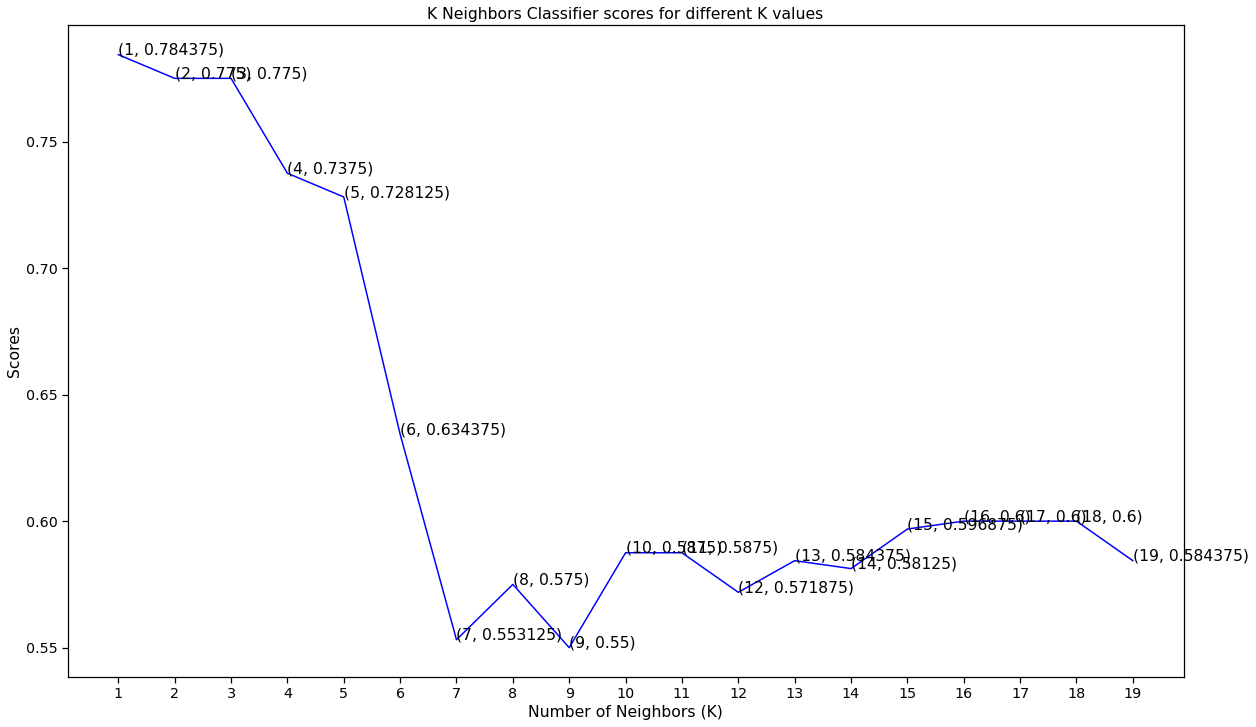

In [48]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib as mpl

knn_scores = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))
    
mpl.rcParams['figure.figsize'] = 20,12
plt.plot([k for k in range(1, 20)], knn_scores, color = 'blue')
for i in range(1,20):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,Y_train)
y_pred1 = knn.predict(X_test)
print("KNN accuracy score is: ",accuracy_score(Y_test,y_pred1))